In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from PlotandFit_functions import *
from scipy import integrate

In [2]:
# plot parameters
plt.rcParams["font.size"]=10
plt.rcParams["lines.markersize"]=3
plt.rcParams["figure.figsize"]=[12,8]
plt.rcParams["figure.dpi"]=400

a_0 = -9051.769444444444
a_1 = 521.9553484568346
b_1 = -1499.236484711731


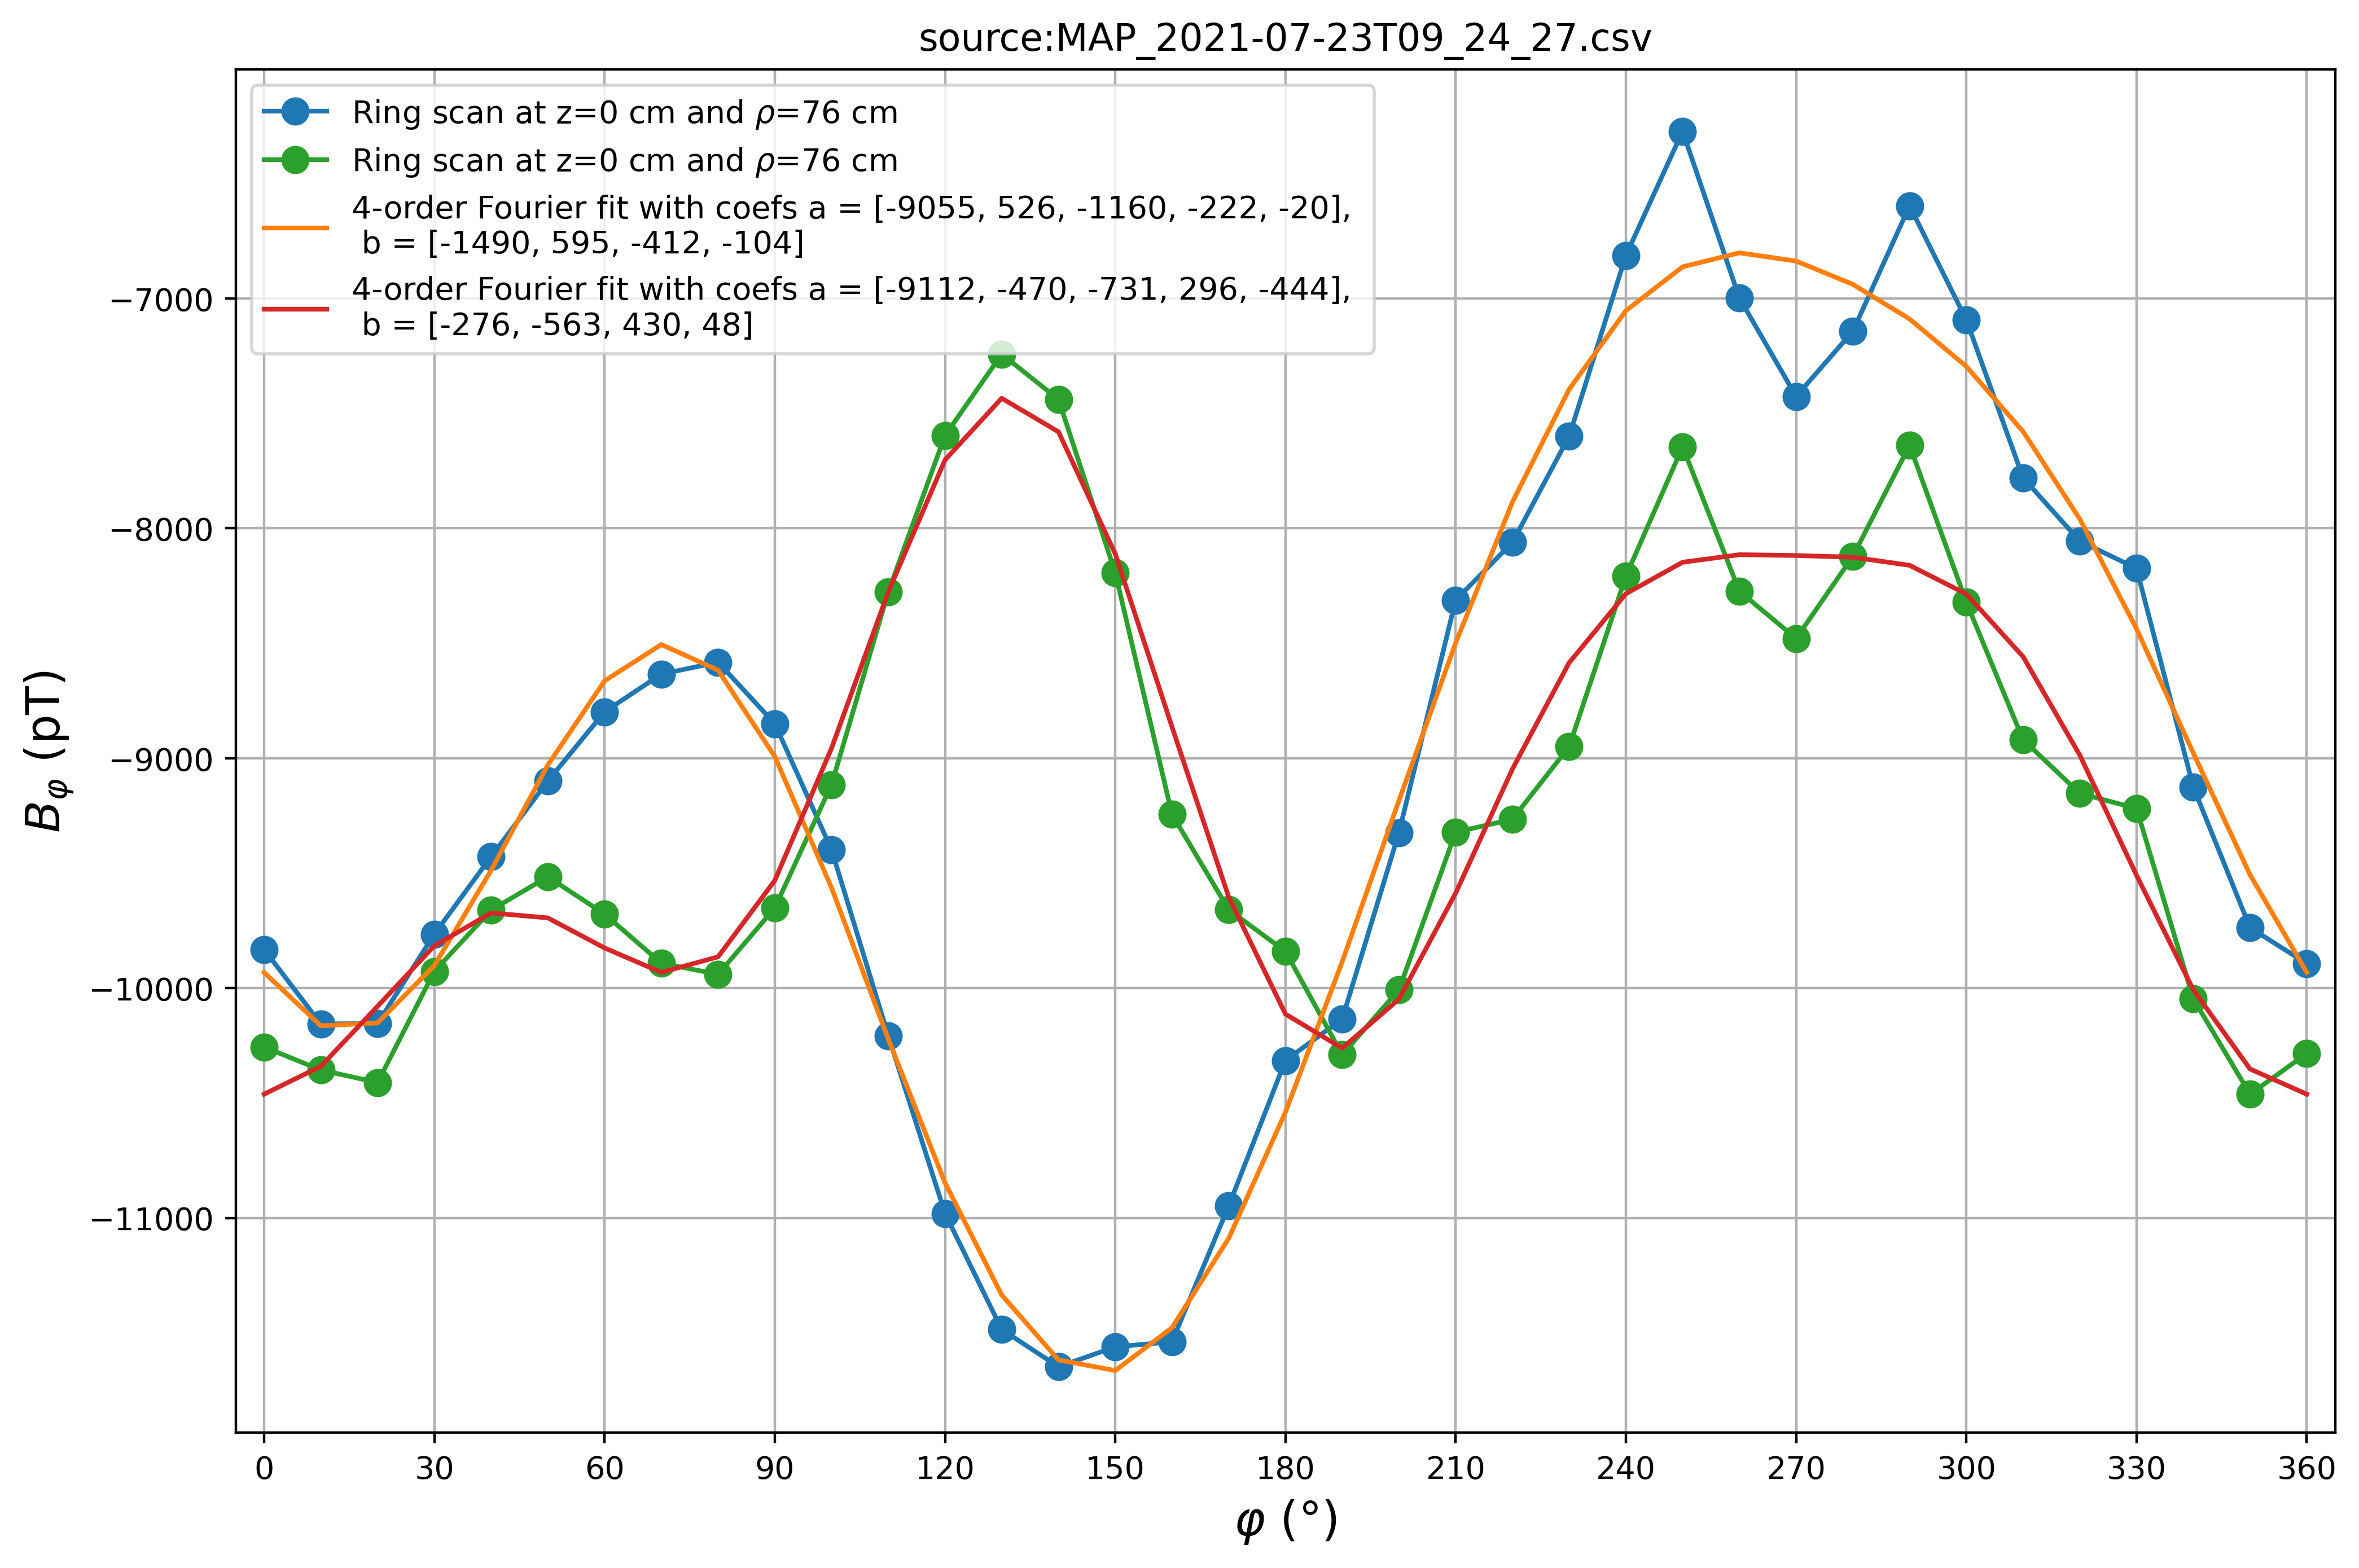

In [3]:
#################### EDIT PARAMS HERE ####################
# getting values
file1 = 'MAP_2021-07-23T09_24_27.csv' # ex: field after degaussing L6
file2 = 'MAP_2021-07-23T10_16_48.csv' # ex: field after degaussing L6 crossed
ringaxis = 1 # axis along which phi rings are split, 1 for rho and 3 for z

# plotting
ring = 2 # ring index
Bvar = 1 # B projection

# fitting
dofit = True
showfit = True
Nfit = 4 # order of the fit

save = False
##########################################################
values1 = mkValues('maps/{}'.format(file1))
R1, B1 = mkCyl(values1, ringaxis)
X1 = np.array(R1[ring][1])
Y1 = np.array(B1[ring][Bvar])
par1, cov1 = seriesFit(Y1, X1, N=Nfit, sigma=0)
y1 = series(X1, par1[:Nfit+1], par1[Nfit+1:2*Nfit+1])

values2 = mkValues('maps/{}'.format(file2))
R2, B2 = mkCyl(values2, ringaxis)
X2 = np.array(R2[ring][1])
Y2 = np.array(B2[ring][Bvar])
par2, cov2 = seriesFit(Y2, X2, N=Nfit, sigma=0)
y2 = series(X2, par2[:Nfit+1], par2[Nfit+1:2*Nfit+1])

################### EDIT PLOTS HERE ######################

### comment bloc #1 and uncomment bloc #2 for field with N-order Fourier modes removed 
### ex: take Nfit = 1 to remove first order Fourier modes 
### /!\ use with showfit = False

#1
plt.plot(X1*180/np.pi, Y1, color='tab:blue', marker='o', linestyle="-", markersize=8, label="Ring scan at z={:.0f} cm and $\\rho$={:.0f} cm".format(R1[ring][2][0], R1[ring][0][0]))
plt.plot(X2*180/np.pi, Y2, color='tab:green', marker='o', linestyle="-", markersize=8, label="Ring scan at z={:.0f} cm and $\\rho$={:.0f} cm".format(R2[ring][2][0], R2[ring][0][0]))

#2
"""
plt.plot(X1*180/np.pi, Y1-y1, color='tab:blue', marker='o', linestyle="-", markersize=8, label="Ring scan at z={:.0f} cm and $\\rho$={:.0f} cm".format(R1[ring][2][0], R1[ring][0][0]))
plt.plot(X2*180/np.pi, Y2-y2, color='tab:green', marker='o', linestyle="-", markersize=8, label="Ring scan at z={:.0f} cm and $\\rho$={:.0f} cm".format(R2[ring][2][0], R2[ring][0][0]))
"""

if showfit==True:
    stra = str([int(par1[i]) for i in range(Nfit+1)])
    strb = str([int(par1[i]) for i in range(Nfit+1, 2*Nfit+1)])
    plt.plot(X1*180/np.pi, y1, color='tab:orange', marker='', linestyle="-", label='{}-order Fourier fit with coefs a = {}, \n b = {}'.format(Nfit, stra, strb))
    stra = str([int(par2[i]) for i in range(Nfit+1)])
    strb = str([int(par2[i]) for i in range(Nfit+1, 2*Nfit+1)])
    plt.plot(X2*180/np.pi, y2, color='tab:red', marker='', linestyle="-", label='{}-order Fourier fit with coefs a = {}, \n b = {}'.format(Nfit, stra, strb))

plt.xlabel(r"$\varphi$ (°)", size=15)
if Bvar==0:
    plt.ylabel(r"$B_\rho$ (pT)", size=15)
if Bvar==1:
    plt.ylabel(r"$B_\varphi$ (pT)", size=15)
if Bvar==2:
    plt.ylabel(r"$B_z$ (pT)", size=15)

plt.xlim(-5, 365)
plt.xticks(np.arange(0, 361, 30))
plt.title('source:{}'.format(file1))
plt.grid()
plt.legend()

if save==True:
    if dofit==True:
        plt.savefig('plots/{}_r_{:.0f}_z{:.0f}_B{}_fit{}.jpg'.format(file1, R1[ring][0][0], R1[ring][2][0], Bvar, Nfit), dpi=400, format='jpg', bbox_inches='tight')
    else:
        plt.savefig('plots/{}_r_{:.0f}_z{:.0f}_B{}.jpg'.format(file1, R1[ring1][0][0], R1[ring1][2][0], Bvar), dpi=400, format='jpg', bbox_inches='tight')
        
##########################################################

# analytical Fourier modes

a0 = 0.5*Cn('a', Y1, 0, 2*np.pi)
a1 = Cn('a', Y1, 1, 2*np.pi)
b1 = Cn('b', Y1, 1, 2*np.pi)

print('a_0 = {}'.format(a0))
print('a_1 = {}'.format(a1))
print('b_1 = {}'.format(b1))